# Perturbation Tracers

We measure tracers of the (tidal) perturbations on each OC, spatial and dynamical.

- Compression along X,Y and Z
- Virial proxy
- velocity dispersion markers
- "halo" excess (tidal loss)
- TBD

In [98]:
using PyCall
using Statistics , MultivariateStats
using Printf
import PyPlot , CSV , Distances

sns= pyimport("seaborn")

rootdir = ENV["GAIA_ROOT"]
push!(LOAD_PATH,"$rootdir/master/src")
using GaiaClustering

#Constants
const G= 4.30091e-3   #[solar mass][pc][km/s]

## directory
wdir    = "$rootdir/products"
plotdir = "$rootdir/products/plots"
ocdir= "$wdir/oc2"

cd(wdir)

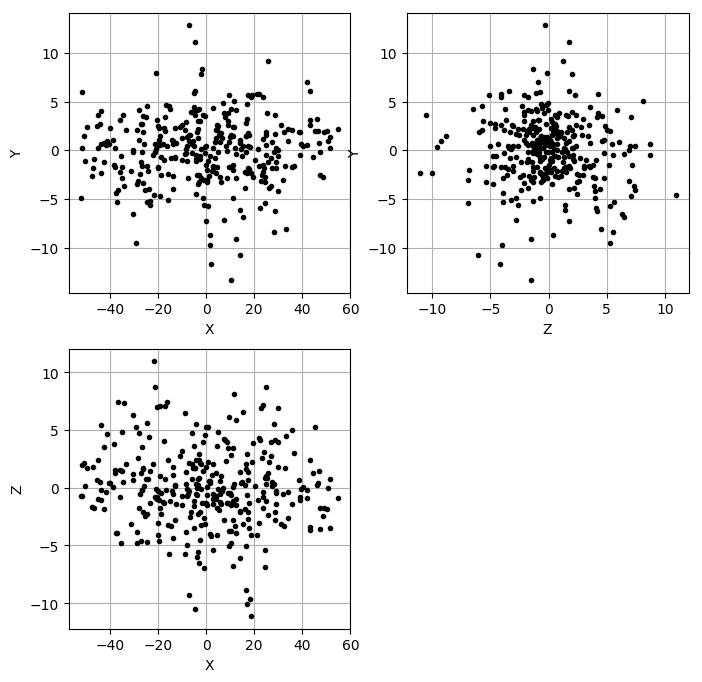

In [99]:
## Reading the test OC

ocname= "$ocdir/NGC 6025-1.7deg-oc.csv"
oc= CSV.read(ocname, delim= ";")

## OC recentered
oc.X= oc.X .- mean(oc.X)
oc.Y= oc.Y .- mean(oc.Y)
oc.Z= oc.Z .- mean(oc.Z)

fig= PyPlot.figure(figsize=(8,8))

ax= PyPlot.subplot(221)
PyPlot.grid("on")
PyPlot.plot(oc.X, oc.Y,"k.")
PyPlot.xlabel("X") ; PyPlot.ylabel("Y")
ax= PyPlot.subplot(222)
PyPlot.grid("on")
PyPlot.plot(oc.Z, oc.Y,"k.")
PyPlot.xlabel("Z") ; PyPlot.ylabel("Y")
ax= PyPlot.subplot(223)
PyPlot.grid("on")
PyPlot.plot(oc.X, oc.Z,"k.")
PyPlot.xlabel("X") ; PyPlot.ylabel("Z")

PyPlot.show()

## XYZ markers

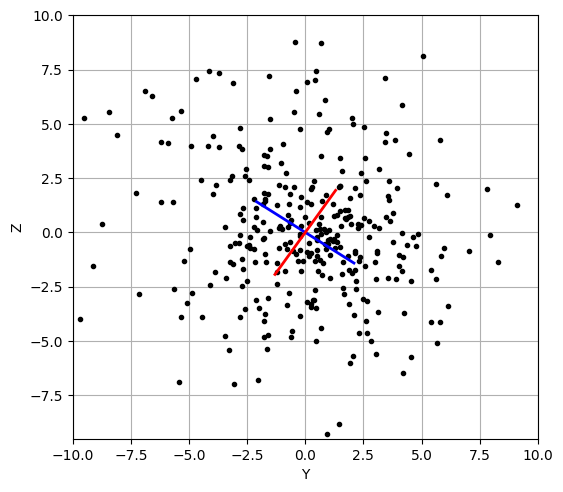

## Using PCA on XYZ to estimate the ellipsoid shape
##
[-0.9999205539013077 0.010348255777752335 0.007197186120974197; -0.004558510742749933 -0.8292058417155915 0.558924764207622; 0.011751845195966521 0.5588475513653933 0.8291871371815859]
[24.60913623780867, 3.5705302079871766, 3.2997414875727995]
## Axis ratio with PC[3]
[7.457898241571185, 1.0820636166300295, 1.0]


In [100]:
data= convert(Matrix, oc[:,8:10])

println("## Using PCA on XYZ to estimate the ellipsoid shape")
println("##")

M = fit(PCA, data')
## dump(M)
prat= principalratio(M)

pvars= principalvars(M)
pdisp= sqrt.(pvars)
proj= projection(M)
println(proj)
println(pdisp)
## Axis ratio
println("## Axis ratio with PC[3]")
println(sqrt.(pvars)./sqrt(pvars[3]))

x1= proj[2,2] ; y1= proj[2,3]
x2= proj[3,2] ; y2= proj[3,3]


x1d= x1 * pdisp[2] / sqrt(2*(x1^2 + y1^2)) ; y1d= y1 * pdisp[2] / sqrt(2*(x1^2 + y1^2))
x2d= x2 * pdisp[3] / sqrt(2*(x2^2 + y2^2)) ; y2d= y2 * pdisp[3] / sqrt(2*(x2^2 + y2^2))

fig= PyPlot.figure(figsize=(6,5.5))
ax= PyPlot.subplot(111)
PyPlot.xlim(-10,10) ; PyPlot.ylim(-9.5,10) ;
PyPlot.grid("on")
PyPlot.plot(oc.Y, oc.Z,"k.",  lw=0.1)
PyPlot.plot((-x1d,x1d),(-y1d,y1d),"b-", lw=2)
PyPlot.plot((-x2d,x2d),(-y2d,y2d),"r-", lw=2)

PyPlot.xlabel("Y") ; PyPlot.ylabel("Z")
PyPlot.show()

In [101]:
println("## Compute XYZ σ dispersion")
println("## ratio are taken wrt. Z")

σx= std(oc.X) ; σy= std(oc.Y) ; σz= std(oc.Z)
kx = σx / σz ; ky= σy / σz

@printf("### σx=%3.3f , σy=%3.3f , σz=%3.3f \n", σx, σy, σz)
@printf("### ratio kx=%3.3f , ky=%3.3f , kz=1.0 \n",kx,ky)

## Compute XYZ σ dispersion
## ratio are taken wrt. Z
### σx=24.607 , σy=3.490 , σz=3.399 
### ratio kx=7.240 , ky=1.027 , kz=1.0 


## Velocity markers

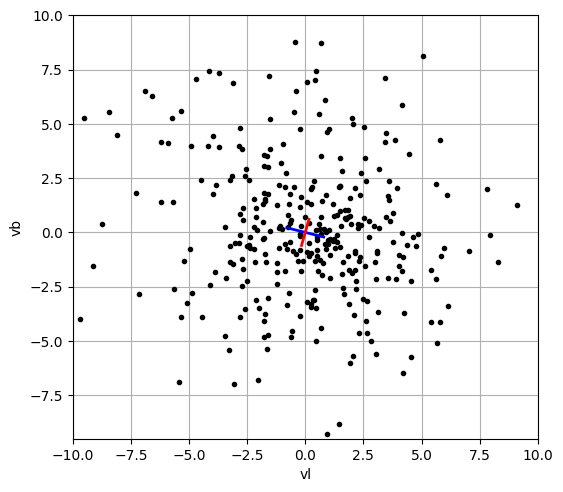

## Compute the PCA of the vl,vb velocities
## Using PCA on vl/vb to estimate the  velocity ellipsoid shape
##
[-0.965856945298521 0.2590759757650441; -0.2590759757650441 -0.965856945298521]
[1.1587257847847674, 0.8778500116282358]
## Axis ratio with PC[2]
[1.3199587280696885, 1.0]


In [102]:
println("## Compute the PCA of the vl,vb velocities")

datav= convert(Matrix, oc[:,11:12])

println("## Using PCA on vl/vb to estimate the  velocity ellipsoid shape")
println("##")

M = fit(PCA, datav')
## dump(M)
prat= principalratio(M)

pvars= principalvars(M)
pdisp= sqrt.(pvars)
proj= projection(M)
println(proj)
println(pdisp)
## Axis ratio
println("## Axis ratio with PC[2]")
println(sqrt.(pvars)./sqrt(pvars[2]))

x1= proj[1,1] ; y1= proj[1,2]
x2= proj[2,1] ; y2= proj[2,2]


x1d= x1 * pdisp[1] / sqrt(2*(x1^2 + y1^2)) ; y1d= y1 * pdisp[1] / sqrt(2*(x1^2 + y1^2))
x2d= x2 * pdisp[2] / sqrt(2*(x2^2 + y2^2)) ; y2d= y2 * pdisp[2] / sqrt(2*(x2^2 + y2^2))


fig= PyPlot.figure(figsize=(6,5.5))
ax= PyPlot.subplot(111)
PyPlot.xlim(-10,10) ; PyPlot.ylim(-9.5,10) ;
PyPlot.grid("on")
PyPlot.plot(oc.Y, oc.Z,"k.",  lw=0.1)
PyPlot.plot((-x1d,x1d),(-y1d,y1d),"b-", lw=2)
PyPlot.plot((-x2d,x2d),(-y2d,y2d),"r-", lw=2)

PyPlot.xlabel("vl") ; PyPlot.ylabel("vb")
PyPlot.show()


In [103]:
println("## Compute Vl Vb σ dispersion")
println("## ratio are taken wrt. Vb")

σvl= std(oc.vl) ; σvb= std(oc.vb) 
kvl = σvl / σvb 

@printf("### σvl=%3.3f , σvb=%3.3f \n", σvl, σvb)
@printf("### ratio kvl=%3.3f",kvl)

## Compute Vl Vb σ dispersion
## ratio are taken wrt. Vb
### σvl=1.142 , σvb=0.899 
### ratio kvl=1.270

## Projected Virial YZ

Estimation of the projected virial using m,y,z,vl,vb of the stars.


In [104]:
## Functions

function virial_2d(mass,x,y,vx,vy)
    nstars= length(mass)
    
    A= Array{Float64}(undef,2,nstars)
    for i in 1:nstars
        A[:,i]= [x[i] y[i]]
    end
    
    d= Distances.Euclidean()
    p= Distances.pairwise(d, A, A, dims=2)
    
    ## potential energy
    Ω= 0.
    for i in 1:nstars
        for j in 1:nstars
            if i!=j
                Ω+= -G * mass[i] * mass[j] / p[i,j]
            end
        end
    end
    
    ## kinetic energy
    T= 0.
    for i in 1:nstars
        T+= 0.5 * mass[i] * (vx[i]^2 + vy[i]^2)
    end
    
    ## Virial
    vir= 2T+Ω
    
    return(vir, T, Ω)
end

virial_2d (generic function with 1 method)

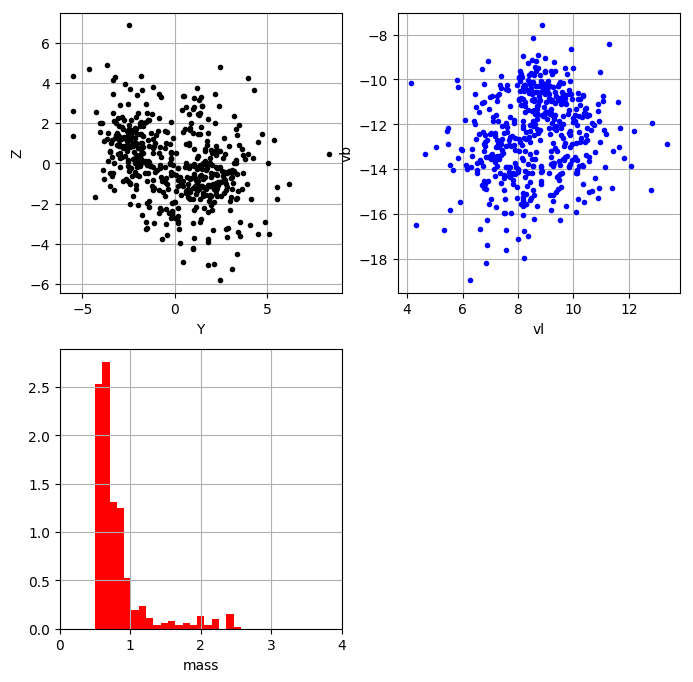

In [105]:
# oc csv file with estimated mass.
ocm= "FSR 0999-1.0deg-oc-mass.csv"
ocm= CSV.read("$ocdir/$ocm", delim=";")

## OC recentered
ocm.X= ocm.X .- mean(ocm.X)
ocm.Y= ocm.Y .- mean(ocm.Y)
ocm.Z= ocm.Z .- mean(ocm.Z)

fig= PyPlot.figure(figsize=(8,8))

ax= PyPlot.subplot(221)
PyPlot.grid("on")
PyPlot.plot(ocm.Y, ocm.Z,"k.")
PyPlot.xlabel("Y") ; PyPlot.ylabel("Z")
ax= PyPlot.subplot(222)
PyPlot.grid("on")
PyPlot.plot(ocm.vl, ocm.vb,"b.")
PyPlot.xlabel("vl") ; PyPlot.ylabel("vb")
ax= PyPlot.subplot(223)
PyPlot.grid("on")
PyPlot.xlim([0,4])
PyPlot.hist(ocm.mass , 20, density=true, facecolor="r")
PyPlot.xlabel("mass") 


PyPlot.show()

In [106]:
## Virial computation
# we need to center the velocity
vlcentered= ocm.vl .- mean(ocm.vl)
vbcentered= ocm.vb .- mean(ocm.vb)

vir, T, V= virial_2d(ocm.mass, ocm.Y, ocm.Z, vlcentered, vbcentered)
@printf("## Virial= %3.3f , T= %3.3f , V= %3.3f", vir, T, V)

## Virial= 1980.798 , T= 1161.312 , V= -341.825